In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D 

In [223]:
# On charge les données du CSV dans une dataframe
ozone = pd.read_csv("C:\\Users\\yanno\\OneDrive\\Documents\\Data Science 1\\ozone.csv", sep=';')
print(ozone)

        Date     O3   T12   T15  Ne12  N12  S12  E12  W12     Vx    O3v  \
0   19960422   63.6  13.4  15.0     7    0    0    3    0   9.35   95.6   
1   19960429   89.6  15.0  15.7     4    3    0    0    0   5.40  100.2   
2   19960506   79.0   7.9  10.1     8    0    0    7    0  19.30  105.6   
3   19960514   81.2  13.1  11.7     7    7    0    0    0  12.60   95.2   
4   19960521   88.0  14.1  16.0     6    0    0    0    6 -20.30   82.8   
5   19960528   68.4  16.7  18.1     7    0    3    0    0  -3.69   71.4   
6   19960605  139.0  26.8  28.2     1    0    0    3    0   8.27   90.0   
7   19960612   78.2  18.4  20.7     7    4    0    0    0   4.93   60.0   
8   19960619  113.8  27.2  27.7     6    0    4    0    0  -4.93  125.8   
9   19960627   41.8  20.6  19.7     8    0    0    0    1  -3.38   62.6   
10  19960704   65.0  21.0  21.1     6    0    0    0    7 -23.68   38.0   
11  19960711   73.0  17.4  22.8     8    0    0    0    2  -6.24   70.8   
12  19960719  126.2  26.9

Text(0.5, 0, 'zz')

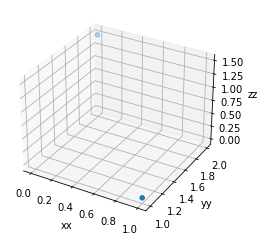

In [261]:
# Création d'un plot 3D dans lequel on représente 2 points

xx , yy = np.meshgrid(range(0,4),range(0,5))
z = 1.5*xx + yy/1.5
pointxx = np.array([0,1])
pointyy = np.array([2,1])
pointzz = np.array([1.5,0])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pointxx,pointyy,pointzz,cmap='green')
ax.set_xlabel("xx")
ax.set_ylabel("yy")
ax.set_zlabel("zz")

In [262]:
print("On jette un coup d'oeil aux premières lignes de notre dataframe")
ozone.head()

On jette un coup d'oeil aux premières lignes de notre dataframe


,Date,O3,T12,T15,Ne12,N12,S12,E12,W12,Vx,O3v,nebulosite,vent
0,19960422,63.6,13.4,15.0,7,0,0,3,0,9.35,95.6,NUAGE,EST
1,19960429,89.6,15.0,15.7,4,3,0,0,0,5.40,100.2,SOLEIL,NORD
2,19960506,79.0,7.9,10.1,8,0,0,7,0,19.30,105.6,NUAGE,EST
3,19960514,81.2,13.1,11.7,7,7,0,0,0,12.60,95.2,NUAGE,NORD
4,19960521,88.0,14.1,16.0,6,0,0,0,6,-20.30,82.8,NUAGE,OUEST


In [263]:
print("On jette un coup d'oeil aux types de variables en colonne")
ozone.info()

On jette un coup d'oeil aux types de variables en colonne
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        50 non-null     int64  
 1   O3          50 non-null     float64
 2   T12         50 non-null     float64
 3   T15         50 non-null     float64
 4   Ne12        50 non-null     int64  
 5   N12         50 non-null     int64  
 6   S12         50 non-null     int64  
 7   E12         50 non-null     int64  
 8   W12         50 non-null     int64  
 9   Vx          50 non-null     float64
 10  O3v         50 non-null     float64
 11  nebulosite  50 non-null     object 
 12  vent        50 non-null     object 
dtypes: float64(5), int64(6), object(2)
memory usage: 5.2+ KB


In [264]:
print("Il ne manque aucune donnée dans la colonne 'T12' ")
ozone[ozone['T12'].isna()].shape

Il ne manque aucune donnée dans la colonne 'T12' 


(0, 13)

In [265]:
print("Il ne manque aucune donnée dans la colonne 'Vx' ")
ozone[ozone['Vx'].isna()].shape

Il ne manque aucune donnée dans la colonne 'Vx' 


(0, 13)

In [266]:
print("Il ne manque aucune donnée dans la colonne 'O3' ")
ozone[ozone['O3'].isna()].shape

Il ne manque aucune donnée dans la colonne 'O3' 


(0, 13)

On affiche les corrélations entre les données de la dataframe selon leurs colonnes pour l'intuition


<AxesSubplot:>

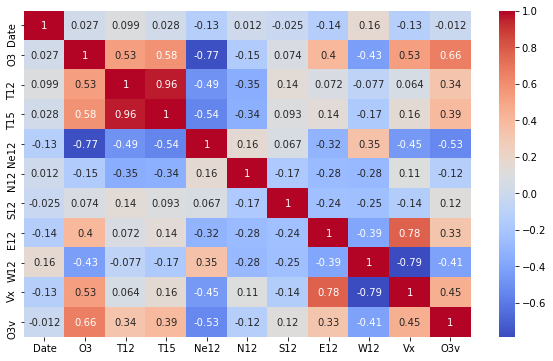

In [267]:
# Affiche la corrélation entre les données de la dataframe selon leurs colonnes
print("On affiche les corrélations entre les données de la dataframe selon leurs colonnes pour l'intuition")
plt.figure(figsize=(10, 6))
sns.heatmap(ozone.corr(), annot=True, cmap='coolwarm', fmt='.2g')

In [269]:
# On convertit les colonnes de notre dataframe qui nous intéresse en array numpy
# On convertit les vecteurs O,T,et V en array numpy afin de faciliter les manipulations des données qui en sont issues.
# On crée un vecteur X composé de deux listes dans lesquelles on trouve exclusivement des données issues de O ou T

O = ozone['O3']
O = O.to_numpy()
print("O3 : ",O)

T = ozone['T12']
T = T.to_numpy()
print("T12 : ",T)

V = ozone['Vx']
V = V.to_numpy()
print("Vx : ",V)

X = np.eye(2,50)

for i in range (50):
    X[0,i] = T[i]
    X[1,i] = V[i]

print("X = ",X)

X0list = X[0].tolist()
X1list = X[1].tolist()

X = [X0list,X1list]
print("X = ",X)

O3 :  [ 63.6  89.6  79.   81.2  88.   68.4 139.   78.2 113.8  41.8  65.   73.
 126.2 127.8  61.6  63.6 134.2  67.2  87.8  96.8  89.6  66.4  60.   90.8
 104.2  70.   96.2  65.6 109.2  86.2  87.4  84.   83.   59.6  52.   73.8
 129.  122.4 106.6 121.8 116.2  81.4  88.6  63.  104.   88.4  83.8  56.4
  50.4  79.2]
T12 :  [13.4 15.   7.9 13.1 14.1 16.7 26.8 18.4 27.2 20.6 21.  17.4 26.9 25.5
 19.4 20.8 29.5 21.7 19.7 19.  20.7 18.  17.4 16.3 13.6 15.8 26.  23.5
 26.3 21.8 24.8 25.2 24.6 16.8 17.1 18.  28.9 23.4 13.  26.  24.9 18.4
 18.7 20.4 19.6 23.2 19.8 18.9 19.7 21.1]
Vx :  [  9.35   5.4   19.3   12.6  -20.3   -3.69   8.27   4.93  -4.93  -3.38
 -23.68  -6.24  14.18  13.79  -7.39 -13.79   1.88 -24.82   9.35  28.36
  12.47  -5.52 -10.8   18.     3.55 -12.6   16.91  -9.35  16.91   2.5
  -7.09 -10.15  -5.52 -27.06  -3.13 -11.57   8.27   5.52  12.6    2.5
  18.   -14.4  -15.59 -22.06 -10.8   -7.2   17.73 -14.4  -17.73   9.26]
X =  [[ 13.4   15.     7.9   13.1   14.1   16.7   26.8   18.4   27.

In [270]:
# Calcul du vecteur des estimateurs beta
Xbeta = np.eye(50,3)

for i in range (50):
    Xbeta[i,0] = 1
    Xbeta[i,1] = T[i]
    Xbeta[i,2] = V[i]
    
Y = O

XT = np.transpose(Xbeta)
XTX = np.dot(XT,Xbeta)
XTXinv = np.linalg.inv(XTX)
XTY = np.dot(XT,Y)
beta = np.dot(XTXinv,XTY)
print(beta)

[35.45300611  2.53804655  0.87357079]


In [271]:
# Définition et lancement du modèle de régression multilinéaire
# Affichage des résultats et paramètres
ones = np.ones(len(X[0]))
x = sm.add_constant(np.column_stack((ones, X[0])))
for ele in X[1:]:
    x = sm.add_constant(np.column_stack((x, ele)))
results = sm.OLS(O, x).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     25.96
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.54e-08
Time:                        14:38:52   Log-Likelihood:                -210.53
No. Observations:                  50   AIC:                             427.1
Df Residuals:                      47   BIC:                             432.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4530     10.745      3.300      0.0

# Analyse des résultats

Le coefficient associé à la constante correspond bien à beta[1] à 10^(-4) près.

Le coefficient associé à x1 = T12 correspond bien à beta[2] à 10^(-4) près.

Le coefficient associé x2 = Vx correspond bien à beta[3] à 10^(-4) près.

R-squared = 0.525, O3 ne dépend donc qu'à 52.5% des variables T12 et Vx.

In [274]:
# Calcul de l'écart type de l'erreur

err = 0
for i in range (50):
    err = err + (O[i] - 35.4530 - 2.5380*T[i] - 0.8736*V[i])*(O[i] - 35.4530 - 2.5380*T[i] - 0.8736*V[i])
print("err = ", err)

var = err/48
print("var = ", var)

ecarttype = pow(var,1/2)
print("ecart type = ", ecarttype)

err =  13299.39858147162
var =  277.07080378065876
ecart type =  16.645443934622435


Text(0.5, 0, 'zz')

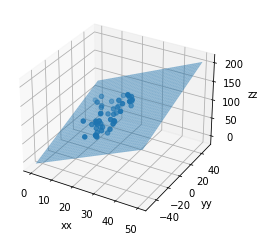

In [273]:
# Affichage des points de données et du plan résultant de la régression multilinéaire modélisée(et donc des coefficients beta1, beta2, beta3 la définissant)

x = np.linspace(0,50,500)
y = np.linspace(-50,50,10000)

xx , yy = np.meshgrid(x,y)
z = 35.4530 +  2.5380*xx + 0.8736*yy

pointxx = T
pointyy = V
pointzz = O

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z,alpha=0.5)

ax.scatter3D(pointxx,pointyy,pointzz,cmap='black')
ax.set_xlabel("xx")
ax.set_ylabel("yy")
ax.set_zlabel("zz")

# LES EUCALYPTUS

In [284]:
# On charge les données du CSV dans une dataframe
eucalyptus = pd.read_csv("C:\\Users\\yanno\\OneDrive\\Documents\\Data Science 1\\eucalyptus.csv", sep=';')
print(eucalyptus)

      numero     ht  circ  bloc   clone
0          1  18.25    36     1  L2-123
1          2  19.75    42     1  L2-123
2          3  16.50    33     1  L2-123
3          4  18.25    39     1  L2-123
4          5  19.50    43     1  L2-123
...      ...    ...   ...   ...     ...
1424    1732  16.50    37     3     2-6
1425    1733  17.00    41     3     2-6
1426    1735  20.25    50     3     2-6
1427    1736  20.25    37     3     2-6
1428    1737  19.75    40     3     2-6

[1429 rows x 5 columns]


In [285]:
# On met toutes les colonnes aux données de type int64 en type float64
cols_to_convert = eucalyptus.columns[0:4]
eucalyptus[cols_to_convert] = eucalyptus[cols_to_convert].astype(float)
eucalyptus

,numero,ht,circ,bloc,clone
0,1.0,18.25,36.0,1.0,L2-123
1,2.0,19.75,42.0,1.0,L2-123
2,3.0,16.50,33.0,1.0,L2-123
3,4.0,18.25,39.0,1.0,L2-123
4,5.0,19.50,43.0,1.0,L2-123
...,...,...,...,...,...
1424,1732.0,16.50,37.0,3.0,2-6
1425,1733.0,17.00,41.0,3.0,2-6
1426,1735.0,20.25,50.0,3.0,2-6
1427,1736.0,20.25,37.0,3.0,2-6


In [286]:
# On enregistre les données de la colonne 'circ' dans une array numpy et on les y met en float64 afin de faciliter leur m
X = eucalyptus['circ']
X = X.to_numpy()
X = X.astype(float)
print(X)

[36. 42. 33. ... 50. 37. 40.]


In [249]:
# Chaque élément de l'array devient sa propre racine
for i in range(1429):
    X[i] = pow(X[i],1/2)
print(X)

[6.         6.4807407  5.74456265 ... 7.07106781 6.08276253 6.32455532]


In [250]:
# On rajoute une colonne à notre dataframe selon notre array X
eucalyptus['racinecirc'] = X
eucalyptus

,numero,ht,circ,bloc,clone,racinecirc
0,1.0,18.25,36.0,1.0,L2-123,6.000000
1,2.0,19.75,42.0,1.0,L2-123,6.480741
2,3.0,16.50,33.0,1.0,L2-123,5.744563
3,4.0,18.25,39.0,1.0,L2-123,6.244998
4,5.0,19.50,43.0,1.0,L2-123,6.557439
...,...,...,...,...,...,...
1424,1732.0,16.50,37.0,3.0,2-6,6.082763
1425,1733.0,17.00,41.0,3.0,2-6,6.403124
1426,1735.0,20.25,50.0,3.0,2-6,7.071068
1427,1736.0,20.25,37.0,3.0,2-6,6.082763


In [252]:
# On convertit les colonnes de notre dataframe qui nous intéresse en array numpy
# On convertit les vecteurs H,C,et RC en array numpy afin de faciliter les manipulations des données qui en sont issues.
# On crée un vecteur X composé de deux listes dans lesquelles on trouve exclusivement des données issues de C ou RC

H = eucalyptus['ht']
H = H.to_numpy()
print("ht : ",H)

C = eucalyptus['circ']
C = C.to_numpy()
print("circ : ",C)

RC = eucalyptus['racinecirc']
RC = RC.to_numpy()
print("racinecirc : ",RC)

X = np.eye(2,1429)

for i in range (1429):
    X[0,i] = C[i]
    X[1,i] = RC[i]

print("X : ",X)


Hlist = H.tolist()
print("List - ",Hlist)

X0list = X[0].tolist()
X1list = X[1].tolist()

X = [X0list,X1list]
print(X)

ht :  [18.25 19.75 16.5  ... 20.25 20.25 19.75]
circ :  [36. 42. 33. ... 50. 37. 40.]
racinecirc :  [6.         6.4807407  5.74456265 ... 7.07106781 6.08276253 6.32455532]
X :  [[36.         42.         33.         ... 50.         37.
  40.        ]
 [ 6.          6.4807407   5.74456265 ...  7.07106781  6.08276253
   6.32455532]]
List -  [18.25, 19.75, 16.5, 18.25, 19.5, 16.25, 17.25, 19.0, 16.25, 17.5, 15.5, 19.75, 22.0, 18.25, 18.25, 20.5, 16.0, 18.0, 20.25, 19.75, 19.0, 19.75, 17.5, 21.0, 21.75, 23.0, 22.25, 23.0, 23.0, 19.0, 23.25, 24.0, 22.0, 19.0, 19.75, 22.25, 21.75, 23.25, 24.25, 23.25, 24.25, 24.5, 23.0, 22.5, 21.25, 19.75, 22.5, 18.75, 12.5, 18.0, 23.5, 24.0, 23.75, 23.75, 23.25, 21.25, 23.25, 20.5, 23.25, 22.25, 23.75, 24.75, 24.25, 21.25, 20.75, 19.75, 22.25, 20.25, 18.75, 21.25, 22.0, 19.75, 16.25, 21.0, 18.75, 21.75, 19.25, 19.75, 21.25, 22.0, 21.75, 20.25, 23.25, 18.25, 22.75, 20.75, 18.5, 21.75, 19.75, 23.75, 23.25, 22.5, 22.25, 22.25, 23.5, 24.25, 21.25, 22.5, 23.0, 21

In [254]:
# Calcul du vecteur des estimateurs beta

Xbeta = np.eye(1429,3)

for i in range (1429):
    Xbeta[i,0] = 1
    Xbeta[i,1] = C[i]
    Xbeta[i,2] = RC[i]
    
Y = H

XT = np.transpose(Xbeta)
XTX = np.dot(XT,Xbeta)
XTXinv = np.linalg.inv(XTX)
XTY = np.dot(XT,Y)
beta = np.dot(XTXinv,XTY)
print(beta)

[-24.35200327  -0.48294547   9.98688814]


In [256]:
# Définition et lancement du modèle de régression multilinéaire
# Affichage des résultats et paramètres

ones = np.ones(len(X[0]))
x = sm.add_constant(np.column_stack((ones, X[0])))
for ele in X[1:]:
    x = sm.add_constant(np.column_stack((x, ele)))
results = sm.OLS(H, x).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     2718.
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        13:11:59   Log-Likelihood:                -2208.5
No. Observations:                1429   AIC:                             4423.
Df Residuals:                    1426   BIC:                             4439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.3520      2.614     -9.314      0.0

# Analyse des résultats

Le coefficient associé à la constante correspond bien à beta[1] à 10^(-4) près.

Le coefficient associé à x1 = 'circ' correspond bien à beta[2] à 10^(-4) près.

Le coefficient associé x2 = 'racinecirc' correspond bien à beta[3] à 10^(-4) près.

R-squared = 0.792, 'ht' dépend donc à 79.2% des variables 'circ' et 'racinecirc'.

Et comme 0.792 > 0.768 et 0.792 > 0.782, on a que la modélisation de 'ht' par régression multilinéaire sur 'circ' et 'racinecirc' est meilleur/plus efficace que les modélisations par régression linéaire sur 'circ' ou 'racinecirc'. 

Par ailleurs, on peut constater que Adj. R-squared = R-squared = 0.792. Cela s'explique du fait qu'on a peu de paramètres explicatifs coparé à la taille de notre échantillon. En effet, 2 < 3 et 3/1429 = 0.00209937018 est beaucoup plus proche de 0 que de 1.

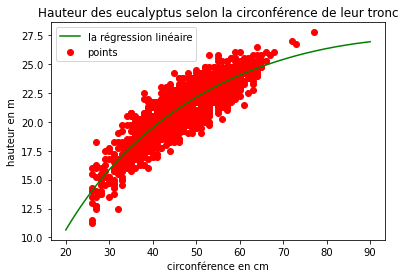

In [282]:
# Affichage des points de données et de la courbe de régression multi linéaire

X = C
Z = H

x = np.linspace(20,90,7000)
z = -24.3520 -0.4829*x +9.9869*pow(x,1/2)

plt.scatter(X, Z, color='r', label='points') 
plt.plot(x, z, color='g', label='la régression linéaire') 
  
plt.xlabel("circonférence en cm") 
plt.ylabel("hauteur en m") 
plt.title("Hauteur des eucalyptus selon la circonférence de leur tronc") 
  
plt.legend() 
  
plt.show() 